# Support Vector Machine (SVM)

Researcher and computer scientist Vladimir Vapnik published in 1995 a paper while working at AT&T Bell Laboratories which introduced the idea of a support-vector network, which today are better known as a Support Vector Machine (SVM). These are so-called supervised max-margin models usually employed for classification and regression analysis [1]. 

The SVM model is a general method that has had a lot of success largely due to its pleasant convex optimization objective function and thus that it guarantees a global solution; given that the data can be separated in some feature space. In fact, the optimization depends **only on the dot product of pairs of samples**, which has some notable advantages in explainability and computational efficiency in higher dimensions, but also disadvantages when it comes to computational complexity of the learning algorithm. We will go into greater detail on this later in the notebook.

The originally proposed SVM perfoms linear classification but it can be extended to learn non-linear decision boundaries as well by using what is called the kernel trick. The kernel trick is used to map pairwise data samples to an arbitrary vector space $V$ where the data might be linearly separable by a hyperplane. What makes this such a nice technique is the fact that the coordinates of the samples do not need to be computed in the higher order vector space $V$, in fact, only the inner product needs to be calculated to produce a scalar value. This is computationally efficient and is one of the characteristics which make SVMs appealing to use for non-linear datasets [2].


## Mathematical description

Given the training dataset $(\bar{x}_i, y_i) \in D$, where $|D| = n$, $|\bar{x}_i| = p$, and $y_i \in \{-1, 1\}$ we want to find the maximum-margin hyperplane with normal vector $\bar{w}$ which separates the group of points $\bar{x}_i$ and $\bar{x}_j$ for which $y_i \neq y_j$. The hyperplane is written as 

$$
\bar{w}^T\bar{x} + b = 0
$$

where the parameter $b$ determines the offset of the hyperplane from the origin along the normal vector $\bar{w}$. For a hard-margin, i.e. when the dataset $D$ is linearly separable (in some space), we aim to find one or more hyperplanes that separate the classes of data such that the distance between them is as large as possible (hence max-margin). The maxmimum-margin hyperplane lies exactly between the other hyperplanes, and is the one we are trying to find.

The hyperplanes that lie at the border of this margin are called supporting hyperplanes and are guaranteed to have one or more samples $\bar{x}_i$ exactly on it. The samples that exist on the supporting hyperplanes, i.e. the margins, are usually referred to as support vectors. For the case of a binary classifier, i.e. where $y_i \in \{-1, 1\}$, we can defines these two supporting hyperplanes as

$$
\begin{align*}

& \bar{w}^T\bar{x} + b = 1, \ \ & \text{if} \ y_i = 1, \\
& \bar{w}^T\bar{x} + b = -1, \ \ & \text{if} \ y_i = -1

\end{align*}
$$

and can be rewritten more efficiently as

$$
y_i(\bar{w}^T\bar{x}_i + b) \geq 1
$$

which if you check by plugging in some numbers is exactly the same equations as above. Visually these two supporting hyperplanes could look something like the plot below where we clearly can see two (in this case) lines that create a maximum-margin between the samples of the different classes, and the maximum-margin hyperplane is seen as the black line precisely in the middle of the other two lines.

We can also see some other vectors which we will go through below.


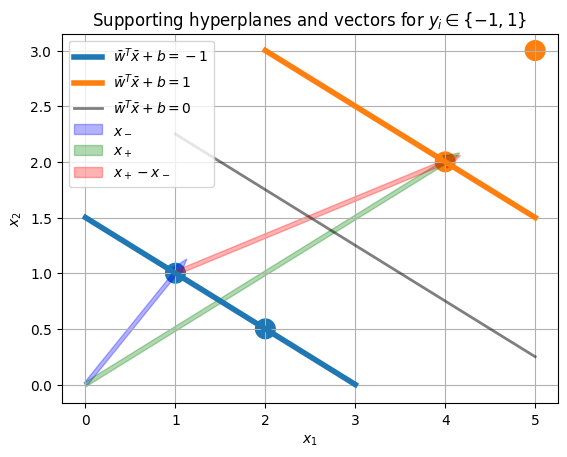

In [50]:
import numpy as np
import matplotlib.pyplot as plt

nsh_xx = np.linspace(0, 3, 10)
psh_xx = np.linspace(2, 5, 10)
mm_xx = np.linspace(1, 5, 10)

# Negative supporting hyperplane
plt.plot(nsh_xx, -0.5 * nsh_xx + 1.5, lw=4, c="tab:blue", label=r"$\bar{w}^T\bar{x} + b = -1$")

# Positive supporting hyperplane
plt.plot(psh_xx, -0.5 * psh_xx + 4, lw=4, c="tab:orange", label=r"$\bar{w}^T\bar{x} + b = 1$")

plt.plot(mm_xx, -0.5 * mm_xx + 2.75, lw=2, c="black", label=r"$\bar{w}^T\bar{x} + b = 0$", alpha=0.5)

plt.scatter([1, 2, 4, 5], [1, 0.5, 2, 3], c=["tab:blue", "tab:blue", "tab:orange", "tab:orange"], s=200)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Vector representing one 
plt.arrow(0, 0, 1, 1, width=0.04, color="blue", label=r"$x_-$", alpha=0.3)
plt.arrow(0, 0, 4, 2, width=0.04, color="green", label=r"$x_+$", alpha=0.3)
plt.arrow(1, 1, 3, 1, width=0.04, color="red", label=r"$x_+ - x_-$", alpha=0.3)
plt.legend()
plt.grid()
plt.title(r"Supporting hyperplanes and vectors for $y_i \in \{-1, 1\}$")
plt.show()


The question now is, how wide is this margin that we have between the supporting hyperplanes? We need to be able to calculate this because this is precisely the component that we want to maximize. 

To answer that we can employ some linear algebra. Given the support vectors $x_+$ and $x_-$ which both lie on the respective supporting hyperplanes, we can calculate the width between the supporting hyperplanes by projecting the difference vector $(x_+ - x_-)$ onto the unit vector of the margin. We know the normal vector of this margin as $\bar{w}$ and so we can calculate this width as

$$
\text{width} = (x_+ - x_-) \cdot \frac{\bar{w}}{||w||}
$$

because the projection of the difference vector is done through the dot product between the vectors. You can see the difference vector $(x_+ - x_-)$ as the red arrow in the plot above, and the respective support vectors as blue and green arrows [3].


We can reformulate the above equation by expanding it and using the equations for the supporting hyperplanes which we defined above in order to arrive at a more workable equation as follows

$$
\begin{align*}

\text{width} & = \frac{\bar{w}\cdot x_+ - \bar{w}\cdot x_-}{||w||} \\
& = \frac{1 - b -(-1 - b)}{||w||} \\
& = \frac{2}{||w||}.

\end{align*}
$$

The objective function of the support vector machine is as such to maximize the above equation, or to minimize an equivalent function, which leads us to the formal definition of the objective as

$$
\begin{align*}

\underset{\bar{w}, b}{\text{minimize}} \ \ & \frac{1}{2} \| \bar{w} \| ^2 \\
\text{subject to} \ \ & y_i (\bar{w}^T\bar{x}_i + b) \geq 1, \ \ \forall i \in \{ 1, \dots, n \}

\end{align*}
$$

which we are allowed to formulate because we can remove or add constants, invert the parameters and subsequentially change it to a minimization problem, and square the parameters such that we have end up with a convex objective function with one guaranteed global solution [4].


To manage the constraint on our supporting hyperplanes and to be able to find a global minimum of our objective function we can utilize Lagrange multipliers. The Lagrangian would thus become

$$
\mathcal{L}(\bar{w}, b, \bar{\alpha}) = \frac{1}{2}||\bar{w}||^2 - \sum_i \alpha_i \Bigl( y_i(\bar{w}\bar{x}_i + b) - 1 \Bigr)
$$

where we set the above constraint equal to zero and introduce the Lagrange multipliers $\bar{\alpha} = (\alpha_1, \dots, \alpha_n)$. To find the extremum, in our case a global minimum, to the objective function we need to find a solution where all the partial derivatives equal zero [5]. Taking the partial derivative of $\mathcal{L}$ with respect to $\bar{w}$ we get the expression

$$
\frac{\partial \mathcal{L}}{\partial \bar{w}} = \bar{w} - \sum_i \alpha_i y_i \bar{x}_i
$$

and by setting it equal to zero we arrive at the really pleasant discovery

$$
\bar{w} = \sum_i \alpha_i y_i \bar{x}_i
$$

which means that the separating hyperplane $\bar{w}$ is exactly a linear sum of each sample $\bar{x}_i \in D$. But to say this for certain we need to also take the partial derivative with respect to $b$, and see if we end up with the same conclusion then,

$$
\frac{\partial \mathcal{L}}{\partial b} = -\sum_i \alpha_i y_i
$$

and setting it equal to zero we can clearly see that our conclusion was correct

$$
\sum_i \alpha_i y_i = 0
$$

and the decision boundary is in fact exactly a linear sum of the samples. Alright, but how does this help us with our optimization? To really see that, we have to use our newly derived expressions for $\bar{w}$ and $b$ in our original Lagrangian. Substituting we arrive at the following expression

$$
\begin{align*}

\mathcal{L}(\bar{w}, b, \bar{\alpha}) = \ & \frac{1}{2} \Bigl( \sum_i \alpha_i y_i \bar{x}_i \Bigr) \cdot \Bigl( \sum_j \alpha_j y_j \bar{x}_j \Bigr) \\
& - \Bigl( \sum_i \alpha_i y_i \bar{x}_i \Bigr) \cdot \Bigl( \sum_j \alpha_j y_j \bar{x}_j \Bigr) \\
& - b\sum_i \alpha_i y_i + \sum_i \alpha_i

\end{align*}
$$

simplifying some by grouping the two summations inside the dot products, and utilizing the fact that we previously concluded that $\sum_i \alpha_i y_i = 0$, we can arrive at our final equation

$$
\mathcal{L}(\bar{w}, b, \bar{\alpha}) = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j \bar{x}_i \cdot \bar{x}_j
$$

which tells us that the optimization problem of finding the maximum-margin hyperplane depends only on dot products between the pairs of samples $\bar{x}_i, \bar{x}_j$ from our dataset $D$.

## References

- [1] Corinna Cortes & Vladimir Vapnik, "Support-vector networks", Mach Learn 20, 273–297 (1995), https://doi.org/10.1007/BF00994018.
- [2] "Kernel method", Wikipedia, visited 2024-09-09, https://en.wikipedia.org/wiki/Kernel_method#Mathematics:_the_kernel_trick.
- [3] "Why is the SVM margin equal to $\frac{2}{||w||}$", Mathematics Stack Exchange, https://math.stackexchange.com/questions/1305925/why-is-the-svm-margin-equal-to-frac2-mathbfw
- [4] Patrick H. Winston, "Lecture 16: Learning: Support Vector Machines", MIT OpenCourseWare, https://ocw.mit.edu/courses/6-034-artificial-intelligence-fall-2010/resources/lecture-16-learning-support-vector-machines/
- [5], "Lagrange multiplier", Wikipedia, visited 2024-09-09, https://en.wikipedia.org/wiki/Lagrange_multiplier
